# Clustering - NGO Help International

### Objective:
- An International humanitarian NGO 'HELP International' has collected 10 million dollars and aims to provide relief to people of countries that are in the direst need of aid. Categorise the countries using some socio-economic and health factors to determine the overall development of the country and based on that, suggest the countries to focus on.

#### Summary of Steps involved:
-------------------------------------------------------
- Data Quality Check
- EDA
- Outlier Treatment
- Scaling
- Hopkins Test: Checking the tendency of the data
- Silhouette & SSD method: Checking the best value for K
- KMeans: with the finalized value of K
- Visualize clusters formed (Scatter, Box.. plot)
- Cluster Profiling (Over: gdpp, child_mort, income)
----------------------------------------------------------------
- Hierarchical Clustering
- Dendogram: Single Linkage
- Dendogram: Complete Linkage
- Use the suitable method and perform the final cut
- Visualize clusters formed (Scatter, Box.. plot)
- Cluster Profiling (Over: gdpp, child_mort, income)
----------------------------------------------------------------
- Report atleast 5 countries in direst need of aid
----------------------------------------------------------------

In [1]:
# importing libraries

import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans

from scipy.cluster.hierarchy import dendrogram
from scipy.cluster.hierarchy import linkage
from scipy.cluster.hierarchy import cut_tree

### Data Quality Check

In [2]:
# Reading data

df = pd.read_csv('Country-data.csv')
df.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


In [3]:
# Shape of data

df.shape

(167, 10)

In [4]:
# Dateset details
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   country     167 non-null    object 
 1   child_mort  167 non-null    float64
 2   exports     167 non-null    float64
 3   health      167 non-null    float64
 4   imports     167 non-null    float64
 5   income      167 non-null    int64  
 6   inflation   167 non-null    float64
 7   life_expec  167 non-null    float64
 8   total_fer   167 non-null    float64
 9   gdpp        167 non-null    int64  
dtypes: float64(7), int64(2), object(1)
memory usage: 13.2+ KB


 - No missing values seen
 - Data types are correctly assigned for each attribute

In [5]:
# Attributes 'exports', 'health' & 'imports' are provided as %age of the GDP per capita. Hence, converting to their actual values

df['exports'] = df.apply(lambda x: (x.gdpp * x.exports)/100, axis=1)
df['imports'] = df.apply(lambda x: (x.gdpp * x.imports)/100, axis=1)
df['health'] = df.apply(lambda x: (x.gdpp * x.health)/100, axis=1)

In [6]:
# reviewing modified dataframe
df.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,55.30,41.9174,248.297,1610,9.44,56.2,5.82,553
1,Albania,16.6,1145.20,267.8950,1987.740,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,1712.64,185.9820,1400.440,12900,16.10,76.5,2.89,4460
3,Angola,119.0,2199.19,100.6050,1514.370,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,5551.00,735.6600,7185.800,19100,1.44,76.8,2.13,12200


### EDA

#### Univariate Analysis

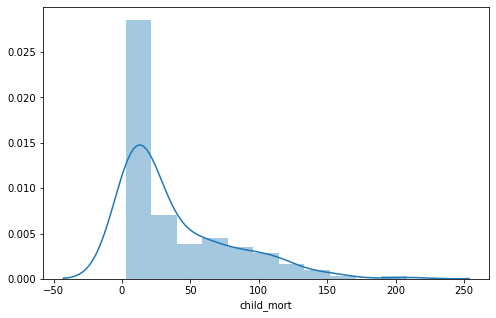

In [7]:
# Child_Mortality
plt.figure(figsize=(8,5))
sns.distplot(df['child_mort'])
plt.show()

- While a lot of countries have Child mortality rate under 50, there are couple of countries with rate even more than 150 going as high as 200

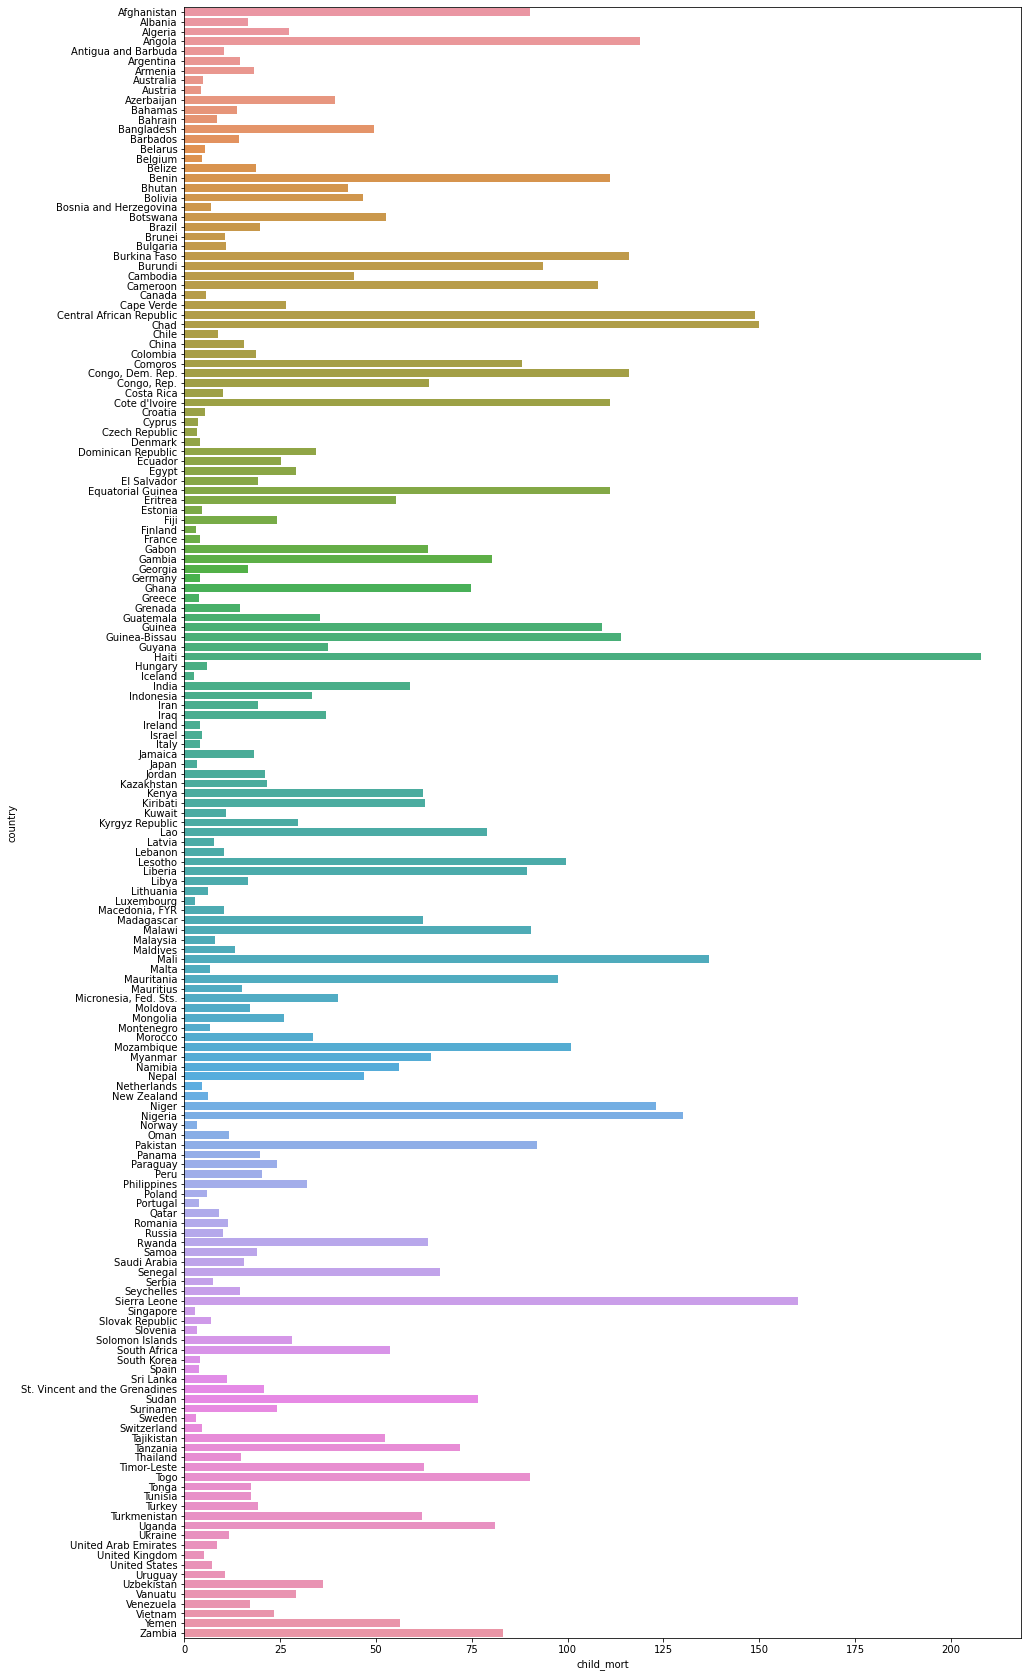

In [8]:
# Child_Mortality - Elaborated
plt.figure(figsize=(15,30))
sns.barplot(x='child_mort',y='country',data=df,orient="h")
plt.show()

###### Child Mornality is defined as 'Death of children under 5 years of age per 1000 live births'.
- While it's ok in countries like Iceland, Luxembourg, Norway, Spain, Slovenia, Singapore, UK and many others
- The situation is worse in countries like: Angola, Central African Republic, Chad, Haiti, Mali, Nigerea, Sierra Leone and many more with more than 100 deaths.

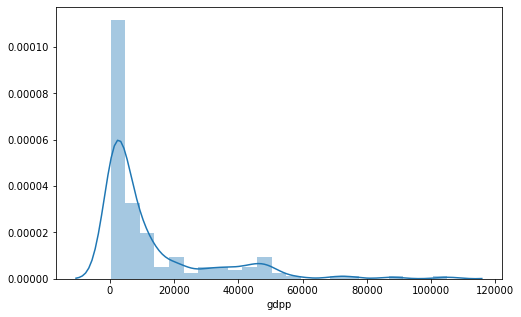

In [9]:
# GDPP
plt.figure(figsize=(8,5))
sns.distplot(df['gdpp'])
plt.show()

 - There are a lot of countries with very low GDP. 

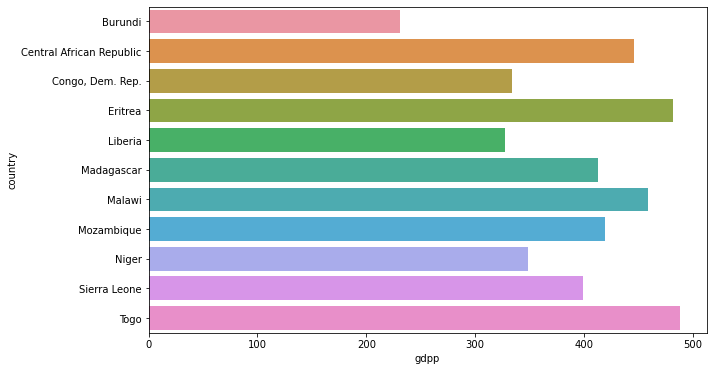

In [10]:
# gdpp - plotting countries with GDP less than 500
plt.figure(figsize=(10,6))
sample = df[df['gdpp']<500]
sns.barplot(x='gdpp',y='country',data=sample,orient="h")
plt.show()

###### GDP per capita (Calculated as the Total GDP divided by the total population.)
- Countries like following are having GDPP even less than 500 : Burundi, Central African Republic, Congo, Eritrea, Liberia, Madagascar, Mozambique, Niger, Sierra Leone, Togo
- While countries like Luxembourg, Norway, Switzerland, Qatar, Denmark and many others have way ahead in same.

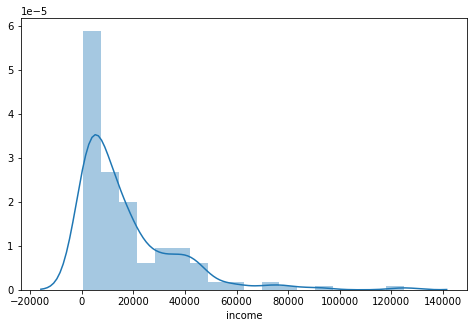

In [11]:
# Income
plt.figure(figsize=(8,5))
sns.distplot(df['income'])
plt.show()

- There are lot of countires with net income per person even less than 1500

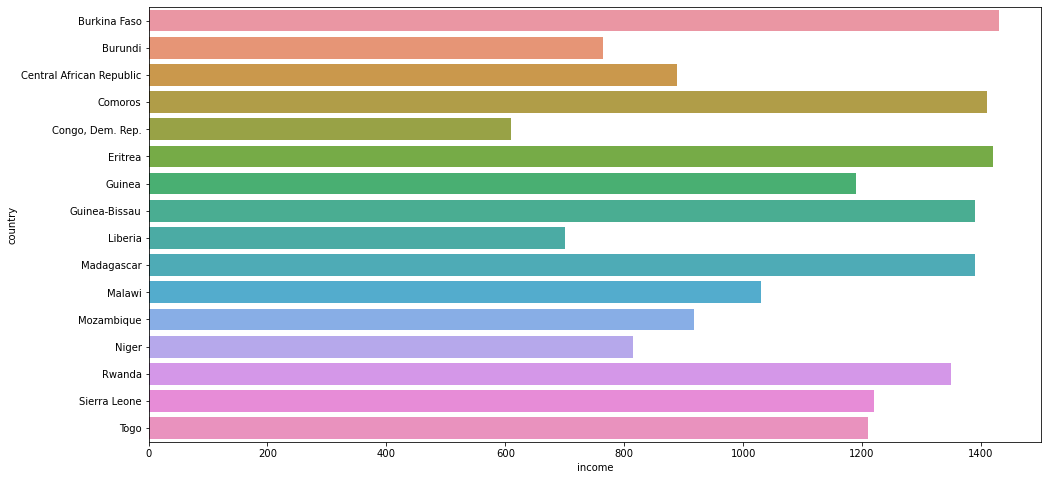

In [12]:
# income - Elaborate
sample = df[df['income']<1500]
plt.figure(figsize=(16,8))
sns.barplot(x='income',y='country',data=sample,orient="h")
plt.show()

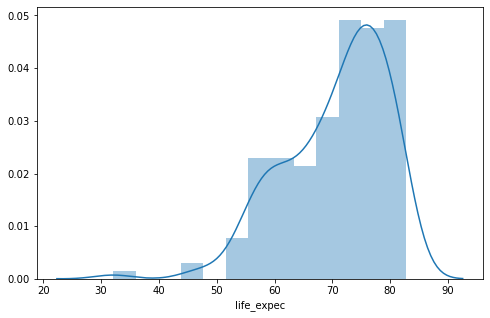

In [13]:
# Life Expectancy
plt.figure(figsize=(8,5))
sns.distplot(df['life_expec'])
plt.show()

- While there are lot of countries with good life expectancy, we also see couple of countries with very low life expectancy. As low as ranging from 30-60

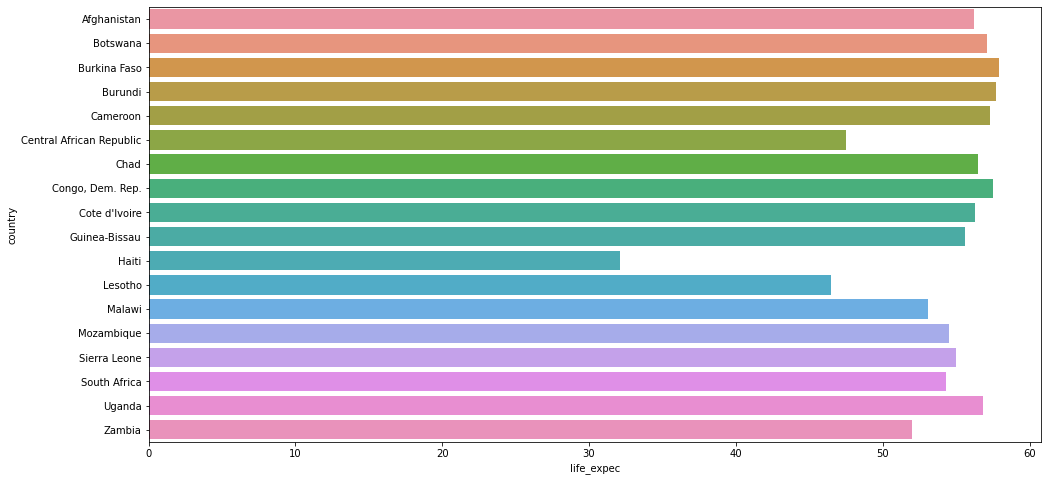

In [14]:
# life_expectancy - countries with Life Expectancy even less than 58

sample = df[df['life_expec']<58]
plt.figure(figsize=(16,8))
sns.barplot(x='life_expec',y='country',data=sample,orient="h")
plt.show()

- We observe countries like Haiti (30+), Lesotho (45+), CAR (45+) have severly low life expectancy. There are a lot others having lower than 58.

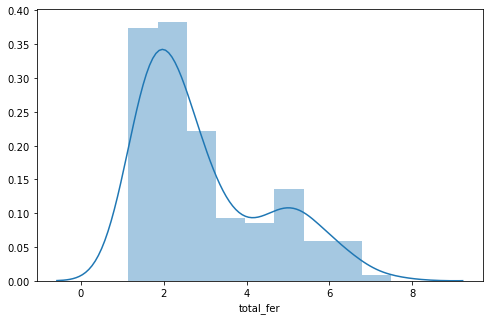

In [15]:
# total fertility
plt.figure(figsize=(8,5))
sns.distplot(df['total_fer'])
plt.show()

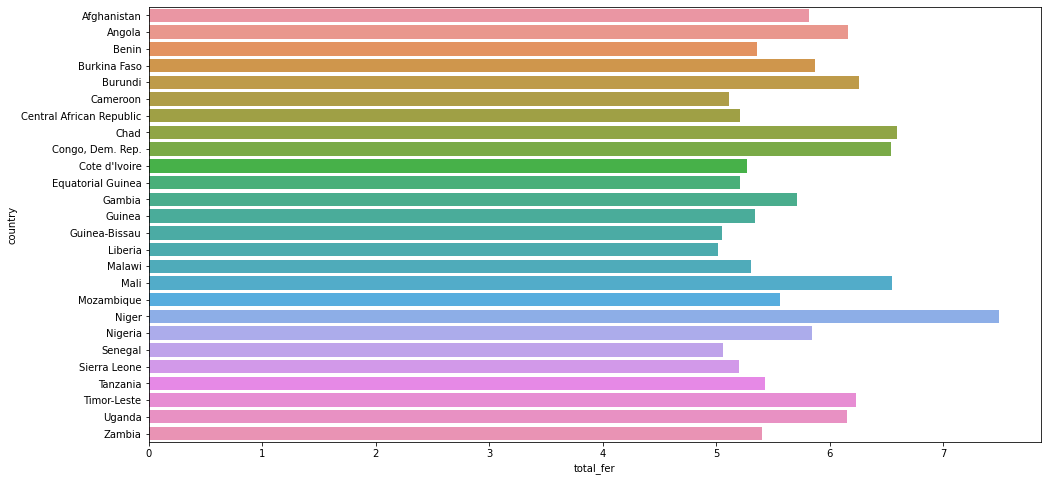

In [16]:
# total fertility - countries with fertility more than 5

sample = df[df['total_fer']>5]
plt.figure(figsize=(16,8))
sns.barplot(x='total_fer',y='country',data=sample,orient="h")
plt.show()

###### Total fertility is defined as number of children that would be born to each woman if the current age-fertility rates remain the same.
- Countries lke Niger, Chad, Mali, Congo, Dem. Rep., Burundi, Timor-Leste, Angola, Uganda, Burkina Faso, Nigeria are few of the largest fertility countries with around 6-7 childrens per woman.
- This definitly prompts difficulty in healthy upbringing of these childs along with added financial pressure.

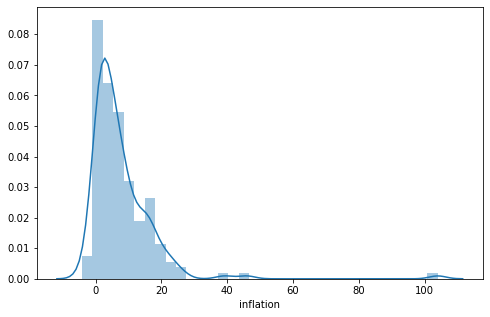

In [17]:
# inflation
plt.figure(figsize=(8,5))
sns.distplot(df['inflation'])
plt.show()

- While for most of the countries the inflation is within range 0-10 and a couple between range 10-20, there are quite a few countries with even more than 20 (~40), varying as high as ~100. 

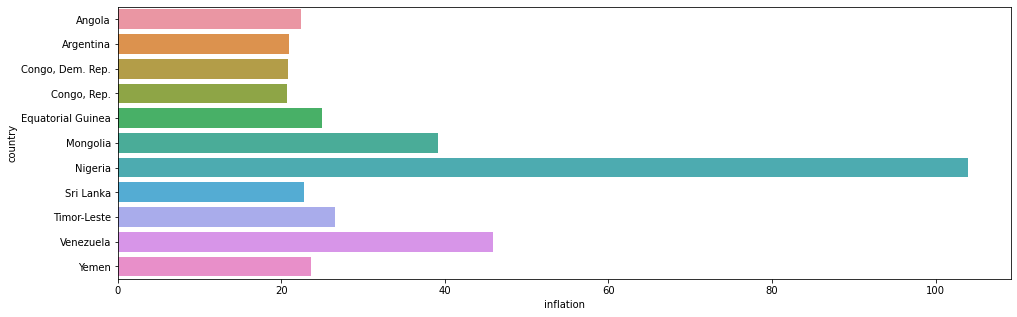

In [18]:
# inflation - countries with inflation more than 20

sample = df[df['inflation']>20]
plt.figure(figsize=(16,5))
sns.barplot(x='inflation',y='country',data=sample,orient="h")
plt.show()

###### Inflation is defined as measurement of the annual growth rate of the GDP deflator
-  Countries like Nigeria, Venezuela, Mongolia, Timor-Leste, Equatorial Guinea, Yemen, Sri Lanka, Angola, Argentina among others have really high inflation


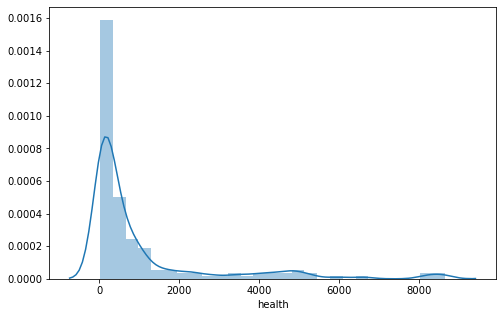

In [19]:
# health
plt.figure(figsize=(8,5))
sns.distplot(df['health'])
plt.show()

- While there are very few countries that spend enough on health, there are way lot of countries that spend almost negligible amount on health sector.

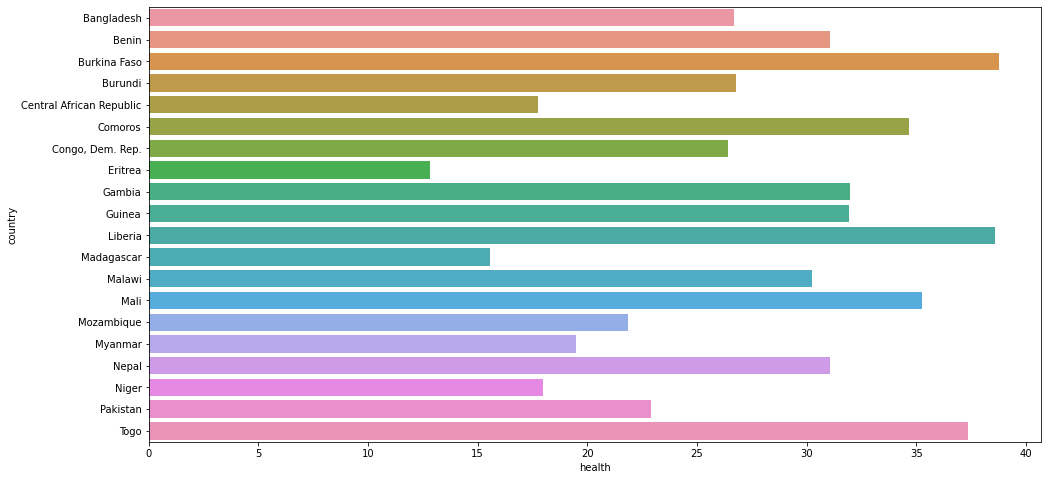

In [20]:
# health - Countries with total health spending per capita less than 40

sample = df[df['health']<40]
plt.figure(figsize=(16,8))
sns.barplot(x='health',y='country',data=sample,orient="h")
plt.show()

- Countries like Eritrea, Madagascar, Central African Republic, Niger, Myanmar, Mozambique, Pakistan, Congo, Dem. Rep., Bangladesh, Burundi and many others spend less than 40 on health sector leading to poor helath ststus of it's population.

#### Bivariate Analysis

In [21]:
# Dataframe
df.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,55.30,41.9174,248.297,1610,9.44,56.2,5.82,553
1,Albania,16.6,1145.20,267.8950,1987.740,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,1712.64,185.9820,1400.440,12900,16.10,76.5,2.89,4460
3,Angola,119.0,2199.19,100.6050,1514.370,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,5551.00,735.6600,7185.800,19100,1.44,76.8,2.13,12200


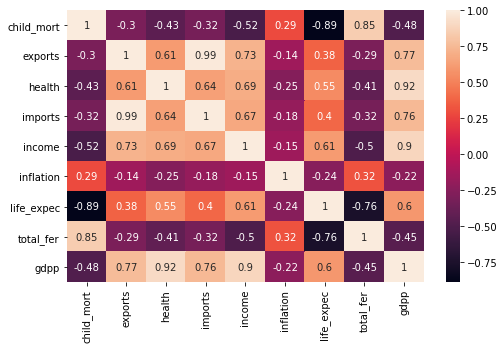

In [22]:
# Heatmap to depict relation between various parameters
plt.figure(figsize=(8,5))
sns.heatmap(df.corr(),annot=True)
plt.show()

<Figure size 720x720 with 0 Axes>

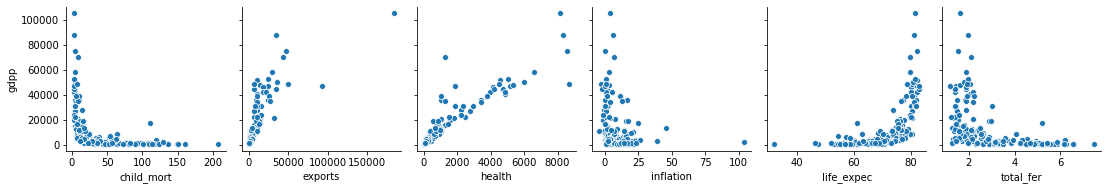

In [23]:
# GDPP v/s all
var = ['child_mort','exports','health','inflation','life_expec','total_fer'] # Excluded Income as it's highly collinear to GDPP & Imports (since its identical to exports)
plt.figure(figsize=(10,10))
sns.pairplot(x_vars=var,y_vars='gdpp',data=df)
plt.show()

 - Countries with increasing (or higher) GDPP have low:
     - Child Mortality rate
     - Total Fertitlity rate
     - Inflation
 - Countries with increasing (or higher) GDPP have high:
     - Exports & Imports
     - Health spending
     - Life Expectancy

<Figure size 720x720 with 0 Axes>

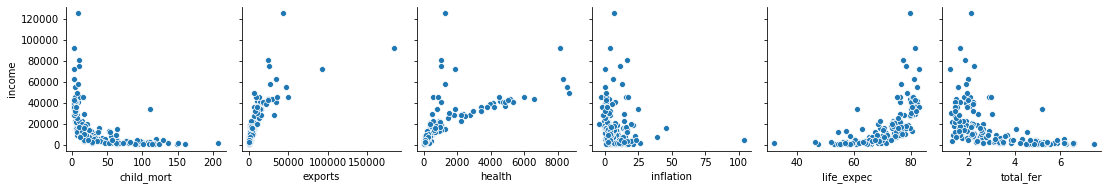

In [24]:
# Income v/s all
var = ['child_mort','exports','health','inflation','life_expec','total_fer'] # Excluded GDPP as it's highly collinear to Income & Imports (since its identical to exports)
plt.figure(figsize=(10,10))
sns.pairplot(x_vars=var,y_vars='income',data=df)
plt.show()

 - Countries with increasing (or higher) Income have low:
     - Child Mortality rate
     - Total Fertitlity rate
     - Inflation
 - Countries with increasing (or higher) Income have high:
     - Exports & Imports
     - Health spending
     - Life Expectancy

<Figure size 720x720 with 0 Axes>

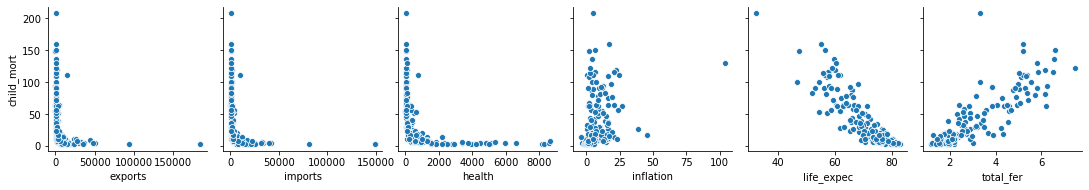

In [25]:
# Child Mortality v/s all
var = ['exports','imports','health','inflation','life_expec','total_fer'] # Excluded GDPP & Income as its covered above already.
plt.figure(figsize=(10,10))
sns.pairplot(x_vars=var,y_vars='child_mort',data=df)
plt.show()

 - Countries least involved in exports and imports are seen with highest child mortality rate. The health spending is also the least for countries with higher child mortality. Clearly, they are financially worst.
 - Child mortality rate correclty decreases with increase in life expectancy.
 - Child mortality rate correclty increases with increase in total fertility, showcasing the financial burden it puts on a family

<Figure size 720x720 with 0 Axes>

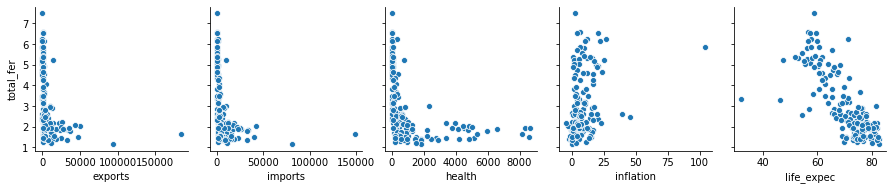

In [26]:
# Total Fertility v/s all
var = ['exports','imports','health','inflation','life_expec'] # Excluded GDPP, Child Mortality & Income as its covered above already.
plt.figure(figsize=(10,10))
sns.pairplot(x_vars=var,y_vars='total_fer',data=df)
plt.show()

 - Countries least involved in exports and imports are seen with higher total fertality rate. The health spending is also the least for countries with higher total fertality. Clearly, with almost exponentially increasing population, things are out of order.
 - Life Expectancy rate correclty increases with fall in total fertility, showcasing the financial burden it puts on a nation.

### Outlier Treatment

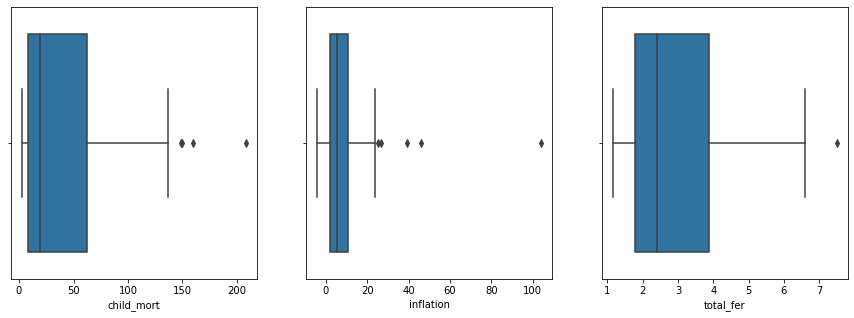

In [27]:
# Observing for outliers in each attribute through BOX plot

# For columns child_mort, inflation, & total_fer we are interested in the upper range to find the worst hit country,
# hence will not treat the upper range outliers (if any) but can deal with the lower range outliers

var1 = ['child_mort','inflation','total_fer']
plt.figure(figsize=(15,5))
for i in enumerate(var1):
    plt.subplot(1,3,i[0]+1)
    sns.boxplot(x=df[i[1]])

- No lower range outliers found. Hence no outlier treatment necessary.

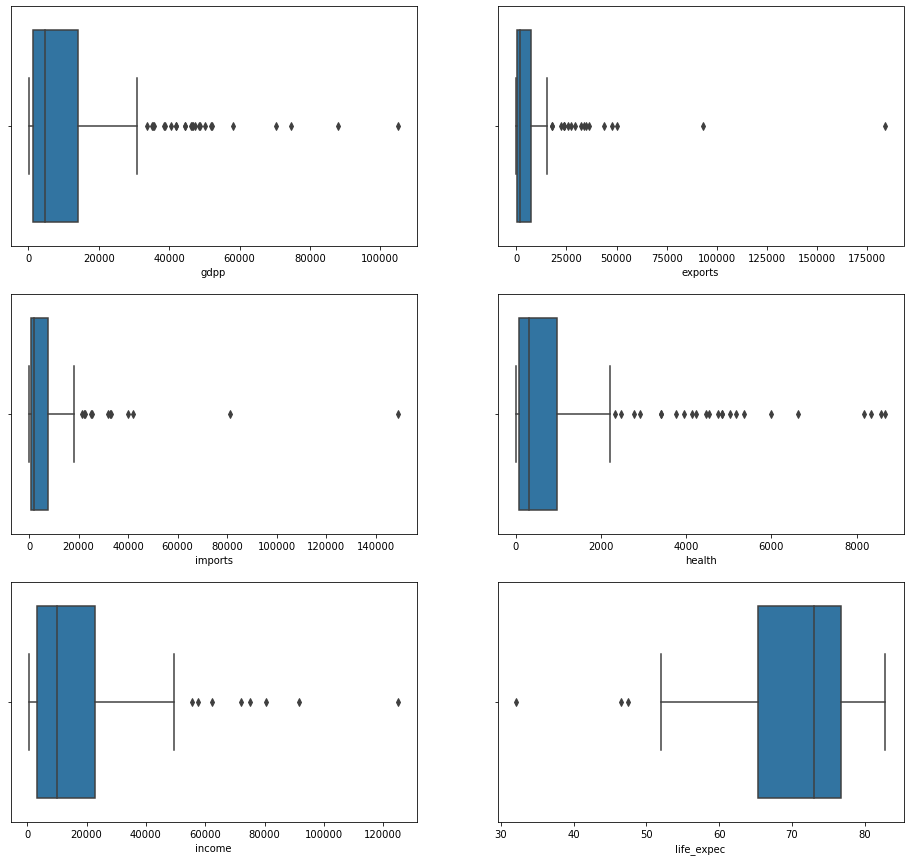

In [28]:
# Observing for outliers in each attribute through box plot

# For remaining attributes, we are interested in lower ranges to find the worst hit nations, hence will not treat
# the lower range outliers, however can deal with the upper range outliers

var = ['gdpp','exports','imports','health','income','life_expec']
plt.figure(figsize=(16,15))
for i in enumerate(var):
    plt.subplot(3,2,i[0]+1)
    sns.boxplot(x=df[i[1]])

- Except for 'Life Expectancy', we could see outliers with significantly higher values than the upper Fence.
- Hence, will treat with 'Hard Capping' to cap the extreme upper end outliers.

In [29]:
# Hard Capping
varcap = ['gdpp','exports','imports','health','income']
for i in enumerate(varcap):
    q4 = df[i[1]].quantile(0.95) #creating cap at 95%
    df[i[1]][df[i[1]]>=q4]=q4  #applying cap

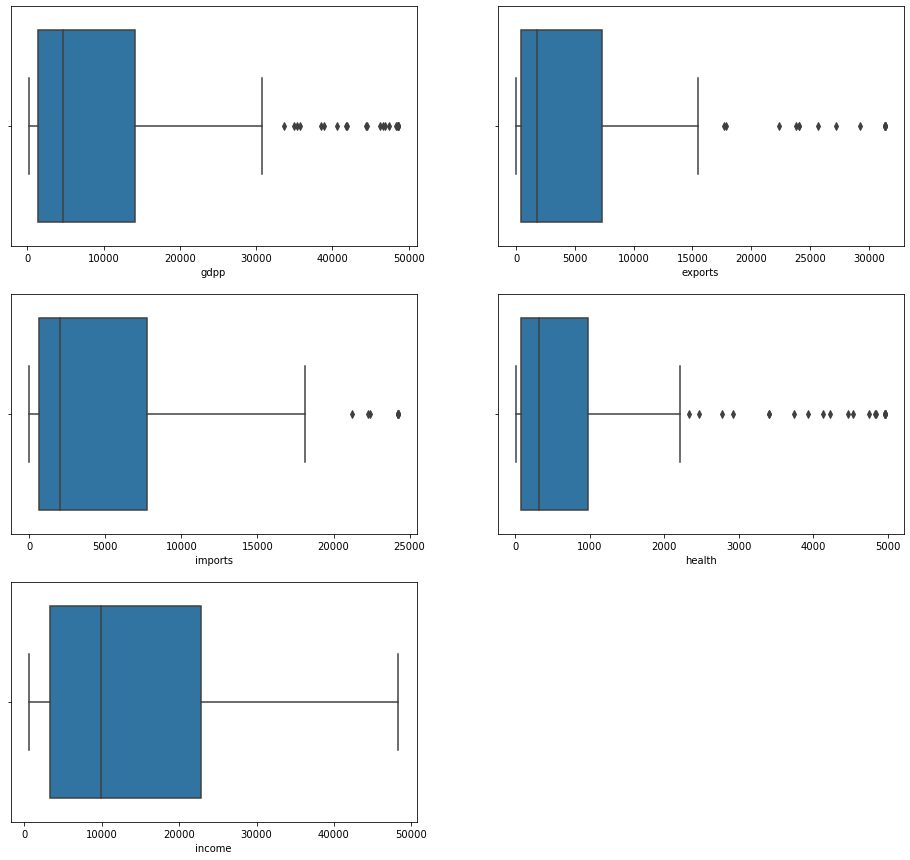

In [30]:
# Re-ploting treated attributes to verify outlier status
varcap = ['gdpp','exports','imports','health','income']
plt.figure(figsize=(16,15))
for i in enumerate(varcap):
    plt.subplot(3,2,i[0]+1)
    sns.boxplot(x=df[i[1]])

In [31]:
# Exclusive case: Dropping Nigeria as it's creating an ambigous cluster with just single country (in Hierarchical clustering) - an Outlier

df.drop(df[df['country']=='Nigeria'].index,inplace=True)

### Scaling

In [32]:
# DataFrame
df.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,55.30,41.9174,248.297,1610.0,9.44,56.2,5.82,553
1,Albania,16.6,1145.20,267.8950,1987.740,9930.0,4.49,76.3,1.65,4090
2,Algeria,27.3,1712.64,185.9820,1400.440,12900.0,16.10,76.5,2.89,4460
3,Angola,119.0,2199.19,100.6050,1514.370,5900.0,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,5551.00,735.6600,7185.800,19100.0,1.44,76.8,2.13,12200


In [33]:
ss = StandardScaler()
df1 = ss.fit_transform(df.drop('country',axis=1))
df1 # so formed scaled numpy array

array([[ 1.32225568, -0.67196623, -0.63164597, ..., -1.62736571,
         1.93014958, -0.75987068],
       [-0.53203789, -0.54479778, -0.47601072, ...,  0.64160275,
        -0.85539851, -0.52624362],
       [-0.26245988, -0.47858945, -0.53242583, ...,  0.66417955,
        -0.02708205, -0.50180426],
       ...,
       [-0.36323671, -0.56836694, -0.59880327, ...,  0.28037394,
        -0.65499937, -0.70986907],
       [ 0.46817209, -0.63256373, -0.61378017, ..., -0.35177648,
         1.16195286, -0.70986907],
       [ 1.14337682, -0.61538858, -0.60128955, ..., -2.10147853,
         1.64959078, -0.69996122]])

In [34]:
# Converting the so formed numpy array to DataFrame
variables = ['child_mort', 'exports', 'health', 'imports', 'income', 'inflation', 'life_expec','total_fer','gdpp']
df2 = pd.DataFrame(df1)
df2.columns = variables

In [35]:
# Scalaed data set to perform clustering
df2.head()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,1.322256,-0.671966,-0.631646,-0.735907,-0.961284,0.300022,-1.627366,1.930150,-0.759871
1,-0.532038,-0.544798,-0.476011,-0.475747,-0.397757,-0.363627,0.641603,-0.855399,-0.526244
2,-0.262460,-0.478589,-0.532426,-0.563586,-0.196594,1.192932,0.664180,-0.027082,-0.501804
3,2.047849,-0.421819,-0.591227,-0.546546,-0.670715,2.037576,-1.187118,2.157269,-0.563233
4,-0.690761,-0.030733,-0.153852,0.301701,0.223342,-0.772542,0.698045,-0.534760,0.009441


### HOPKINS : Checking cluster tendency

In [36]:
# Calculating Hopkins statistic

from sklearn.neighbors import NearestNeighbors
from random import sample
from numpy.random import uniform
import numpy as np
from math import isnan
 
def hopkins(X):
    d = X.shape[1]
    #d = len(vars) # columns
    n = len(X) # rows
    m = int(0.1 * n) 
    nbrs = NearestNeighbors(n_neighbors=1).fit(X.values)
 
    rand_X = sample(range(0, n, 1), m)
 
    ujd = []
    wjd = []
    for j in range(0, m):
        u_dist, _ = nbrs.kneighbors(uniform(np.amin(X,axis=0),np.amax(X,axis=0),d).reshape(1, -1), 2, return_distance=True)
        ujd.append(u_dist[0][1])
        w_dist, _ = nbrs.kneighbors(X.iloc[rand_X[j]].values.reshape(1, -1), 2, return_distance=True)
        wjd.append(w_dist[0][1])
 
    H = sum(ujd) / (sum(ujd) + sum(wjd))
    if isnan(H):
        print(ujd, wjd)
        H = 0
 
    return H

In [37]:
hopkins(df2)

0.8603957665225463

##### Have got good hopkins statistic for 10 different itterations - 0.89, 0.87, 0.90, 0.89, 0.91, 0.90, 0.92, 0.87, 0.89, 0.90. Hence, the data set does contain groups & is good for clustering

### Silhouette & SSD method: Fnding the best value for K

##### Silhouette Curve

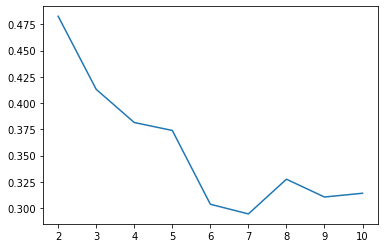

In [38]:
s_score = [] #creating an empty list for keeping Silhouette scores for different values of k(clusters)
for k in range(2,11):
    kmeans = KMeans(n_clusters=k).fit(df2)
    s_score.append([k,silhouette_score(df2,kmeans.labels_)])

sil_df = pd.DataFrame(s_score)
plt.plot(sil_df[0],sil_df[1])
plt.show()

- We may consider 3 clusters as it's grossing highest score of all available clusters

##### SSD (Sum of Squared distances) or Elbow Curve

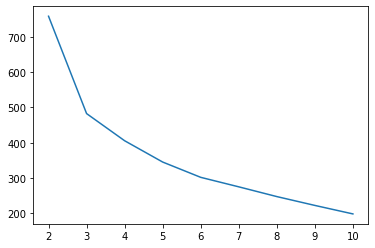

In [39]:
ed = [] #creating empty list to contain the sum of squared distances (ed: Euclidean Distance) of all clusters data points
for k in range(2,11):
    kmeans_ed = KMeans(n_clusters=k).fit(df2)
    ed.append([k,kmeans_ed.inertia_])

ssd = pd.DataFrame(ed)
plt.plot(ssd[0],ssd[1])
plt.show()

- We see a significant change in value (sharp elbow) at cluster k=3 (as compared to rest). Hence, we may go ahead with total 3 clusters.

### KMEANS with finalised value of k=3

In [40]:
kmeans_fin = KMeans(n_clusters=3,random_state=100) #random_state used so as to preserve the same cluster lables when executed multiple times
kmeans_fin.fit(df2)

KMeans(n_clusters=3, random_state=100)

In [41]:
# Reviewing created cluster lables
kmeans_fin.labels_

array([2, 0, 0, 2, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 2, 0, 0, 0, 2,
       0, 1, 0, 2, 2, 0, 2, 1, 0, 2, 2, 0, 0, 0, 2, 2, 2, 0, 2, 0, 1, 1,
       1, 0, 0, 0, 0, 2, 2, 0, 0, 1, 1, 2, 2, 0, 1, 2, 1, 0, 0, 2, 2, 0,
       2, 0, 1, 0, 0, 0, 2, 1, 1, 1, 0, 1, 0, 0, 2, 2, 1, 0, 2, 0, 0, 2,
       2, 0, 0, 1, 0, 2, 2, 0, 0, 2, 1, 2, 0, 0, 0, 0, 0, 0, 2, 0, 2, 0,
       1, 1, 2, 1, 0, 2, 0, 0, 0, 0, 0, 1, 1, 0, 0, 2, 0, 0, 2, 0, 0, 2,
       1, 1, 1, 2, 2, 1, 1, 0, 0, 2, 0, 1, 1, 0, 2, 0, 2, 2, 0, 0, 0, 0,
       2, 0, 1, 1, 1, 0, 0, 0, 0, 0, 2, 2])

In [42]:
#Original Dataframe
df.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,55.30,41.9174,248.297,1610.0,9.44,56.2,5.82,553
1,Albania,16.6,1145.20,267.8950,1987.740,9930.0,4.49,76.3,1.65,4090
2,Algeria,27.3,1712.64,185.9820,1400.440,12900.0,16.10,76.5,2.89,4460
3,Angola,119.0,2199.19,100.6050,1514.370,5900.0,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,5551.00,735.6600,7185.800,19100.0,1.44,76.8,2.13,12200


In [43]:
# Adding another column with cluster id's
df['cluster_id'] = kmeans_fin.labels_
df.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,cluster_id
0,Afghanistan,90.2,55.30,41.9174,248.297,1610.0,9.44,56.2,5.82,553,2
1,Albania,16.6,1145.20,267.8950,1987.740,9930.0,4.49,76.3,1.65,4090,0
2,Algeria,27.3,1712.64,185.9820,1400.440,12900.0,16.10,76.5,2.89,4460,0
3,Angola,119.0,2199.19,100.6050,1514.370,5900.0,22.40,60.1,6.16,3530,2
4,Antigua and Barbuda,10.3,5551.00,735.6600,7185.800,19100.0,1.44,76.8,2.13,12200,0


In [44]:
# Number of countries in each cluster
df.cluster_id.value_counts()

0    82
2    47
1    37
Name: cluster_id, dtype: int64

### Visualize clusters formed

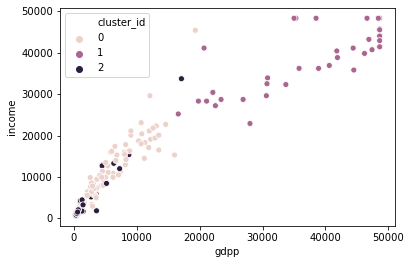

In [45]:
sns.scatterplot(x='gdpp',y='income',data=df,hue='cluster_id')
plt.show()

- We can clearly observe a linear relation between the two parameters appropriately clustered in 3 different segments varying from low to high
- Cluster 1 belong to high income & high GDPP group
- Cluster 0 belong to around nominal income & similar GDPP group
- Cluster 2 belong to least income & least GDPP group

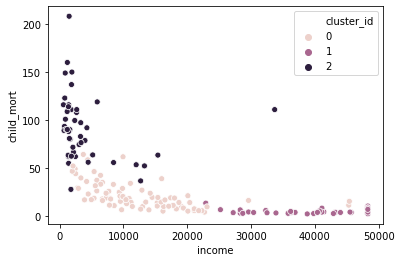

In [46]:
sns.scatterplot(x='income',y='child_mort',data=df,hue='cluster_id')
plt.show()

- We can clearly observe a declining relation between the two parameters with increase in income and appropriately clustered in 3 different segments varying from high to low.
- Cluster 1 belong to high income & least child mortality group
- Cluster 0 belong to around nominal income & slightly higher mortality group
- Cluster 2 belong to least income & highest child mortality group

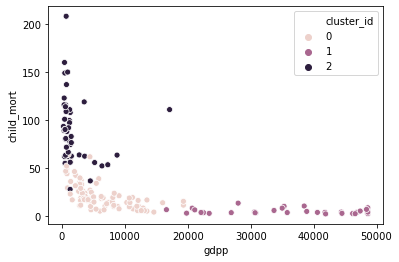

In [47]:
sns.scatterplot(x='gdpp',y='child_mort',data=df,hue='cluster_id')
plt.show()

- We can clearly observe a declining relation between the two parameters with increase in gdpp and appropriately clustered in 3 different segments varying from high to low.
- Cluster 1 belong to high GDPP & least child mortality group
- Cluster 0 belong to around nominal GDPP & slightly higher mortality group
- Cluster 2 belong to least GDPP & highest child mortality group

### Cluster Profiling

In [48]:
df.groupby(['cluster_id'])[['gdpp','income','child_mort']].mean()

,gdpp,income,child_mort
cluster_id,,,
0,6287.463415,12304.756098,21.951220
1,37745.675676,38711.081081,5.237838
2,1900.255319,3870.702128,90.793617


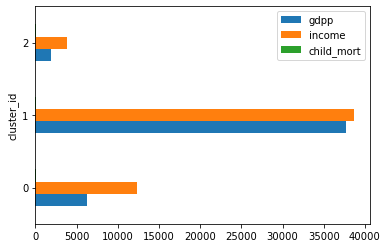

In [49]:
df.groupby(['cluster_id'])[['gdpp','income','child_mort']].mean().plot(kind='barh')
plt.show()

#### Obervation:
- We can clearly see :
    - Cluster 1 belongs to countries with high income, high GDPP (developed countries) and therefore least Child Mortality
    - Cluster 0 belongs to countries with slightly lesser income & GDPP (perhaps developing countries) & thus a bit increased Child Mortality (compared to Cluster 1 countries)
    - Cluster 2 belongs to countries with least income, least GDPP (under developed countries) and thus highest Child Mortality

###### Thus, Cluster 2 countries are definitely in dire need of aid

### Identifying the country names in need of aid

In [50]:
aid_grp = df[df['cluster_id']==2] # group of countries (belonging to cluster 2) requiring aid
aid_grp.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,cluster_id
0,Afghanistan,90.2,55.300,41.9174,248.297,1610.0,9.440,56.2,5.82,553,2
3,Angola,119.0,2199.190,100.6050,1514.370,5900.0,22.400,60.1,6.16,3530,2
17,Benin,111.0,180.404,31.0780,281.976,1820.0,0.885,61.8,5.36,758,2
21,Botswana,52.5,2768.600,527.0500,3257.550,13300.0,8.920,57.1,2.88,6350,2
25,Burkina Faso,116.0,110.400,38.7550,170.200,1430.0,6.810,57.9,5.87,575,2


In [51]:
# List of top 10 countries ordered in ascending order of Income,GDPP and descending order of Mortality rate.
aid_grp.sort_values(by=['income','gdpp','child_mort'],ascending=[True,True,False]).head(10)

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,cluster_id
37,"Congo, Dem. Rep.",116.0,137.2740,26.4194,165.664,609.0,20.80,57.5,6.54,334,2
88,Liberia,89.3,62.4570,38.5860,302.802,700.0,5.47,60.8,5.02,327,2
26,Burundi,93.6,20.6052,26.7960,90.552,764.0,12.30,57.7,6.26,231,2
112,Niger,123.0,77.2560,17.9568,170.868,814.0,2.55,58.8,7.49,348,2
31,Central African Republic,149.0,52.6280,17.7508,118.190,888.0,2.01,47.5,5.21,446,2
106,Mozambique,101.0,131.9850,21.8299,193.578,918.0,7.64,54.5,5.56,419,2
94,Malawi,90.5,104.6520,30.2481,160.191,1030.0,12.10,53.1,5.31,459,2
63,Guinea,109.0,196.3440,31.9464,279.936,1190.0,16.10,58.0,5.34,648,2
150,Togo,90.3,196.1760,37.3320,279.624,1210.0,1.18,58.7,4.87,488,2
132,Sierra Leone,160.0,67.0320,52.2690,137.655,1220.0,17.20,55.0,5.20,399,2


##### Recommendation based on above Kmeans analysis:
- Above is the ordered list of 'TOP 10' countries with least Income, GDPP and highest mortality rates among all the crisis hit regions.

### Hierarchical Clustering

In [52]:
# Scaled data
df2.head()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,1.322256,-0.671966,-0.631646,-0.735907,-0.961284,0.300022,-1.627366,1.930150,-0.759871
1,-0.532038,-0.544798,-0.476011,-0.475747,-0.397757,-0.363627,0.641603,-0.855399,-0.526244
2,-0.262460,-0.478589,-0.532426,-0.563586,-0.196594,1.192932,0.664180,-0.027082,-0.501804
3,2.047849,-0.421819,-0.591227,-0.546546,-0.670715,2.037576,-1.187118,2.157269,-0.563233
4,-0.690761,-0.030733,-0.153852,0.301701,0.223342,-0.772542,0.698045,-0.534760,0.009441


#### Hierarchical clustering using Single linkage

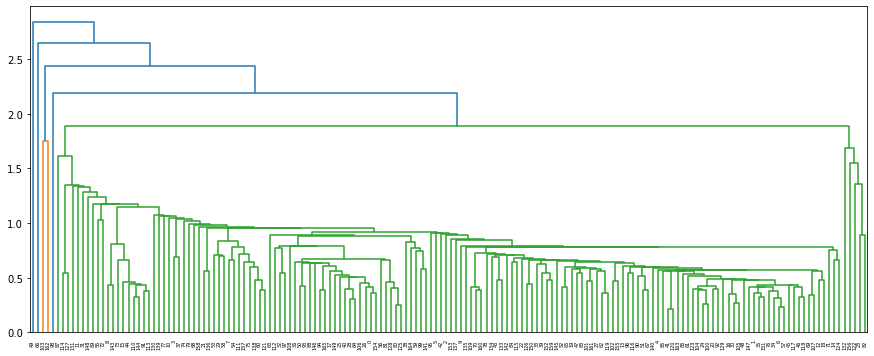

In [53]:
plt.figure(figsize=(15,6))
SL = linkage(df2,method='single',metric='euclidean')
dendrogram(SL)
plt.show()

- Single linkage uses least/shortest distance between any two points of two clusters as measure of disimilarity. This is the reason that clusters are bit loosly structured and at times give a doubtful understanding.

#### Hierarchical clustering using Complete linkage

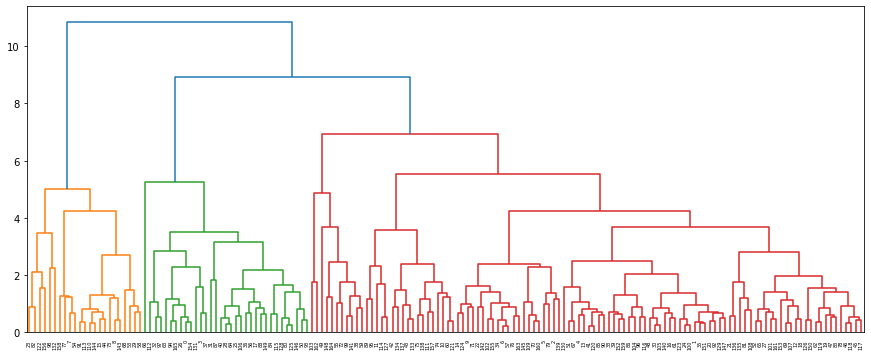

In [54]:
plt.figure(figsize=(15,6))
CL = linkage(df2,method='complete',metric='euclidean')
dendrogram(CL)
plt.show()

 - Complete linkage uses maximum distance between any two points of the two clusters. It thus produces clusters having proper tree like structure giving distinct interpretation of each nodes.
 - Through complete linkage we are also able to identify feasible clusters looking at the tree. Also, we can further drill down to even more clusters with higher sense of understanding knowing the significant size of next cluster.
 - In this case, we can go ahead with 3 clusters.

#### Clustering using Complete linkage

In [55]:
# creating three clusters by cutting tree
clusters = cut_tree(CL,n_clusters=3)
clusters

array([[0],
       [1],
       [1],
       [0],
       [1],
       [1],
       [1],
       [2],
       [2],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [2],
       [1],
       [0],
       [1],
       [1],
       [1],
       [1],
       [1],
       [2],
       [1],
       [0],
       [0],
       [1],
       [0],
       [2],
       [1],
       [0],
       [0],
       [1],
       [1],
       [1],
       [0],
       [0],
       [1],
       [1],
       [0],
       [1],
       [1],
       [1],
       [2],
       [1],
       [1],
       [1],
       [1],
       [1],
       [0],
       [1],
       [1],
       [2],
       [2],
       [1],
       [0],
       [1],
       [2],
       [1],
       [1],
       [1],
       [1],
       [0],
       [0],
       [1],
       [0],
       [1],
       [2],
       [1],
       [1],
       [1],
       [1],
       [2],
       [1],
       [1],
       [1],
       [2],
       [1],
       [1],
       [0],
       [1],
       [2],
    

In [56]:
#Shape of array
clusters.shape

(166, 1)

In [57]:
# the above function returns clusters in array format. will change it to series in order to add to the main Dataframe
cluster_labels = clusters.reshape(-1,)
cluster_labels

array([0, 1, 1, 0, 1, 1, 1, 2, 2, 1, 1, 1, 1, 1, 1, 2, 1, 0, 1, 1, 1, 1,
       1, 2, 1, 0, 0, 1, 0, 2, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1,
       2, 1, 1, 1, 1, 1, 0, 1, 1, 2, 2, 1, 0, 1, 2, 1, 1, 1, 1, 0, 0, 1,
       0, 1, 2, 1, 1, 1, 1, 2, 1, 1, 1, 2, 1, 1, 0, 1, 2, 1, 0, 1, 1, 0,
       0, 1, 1, 2, 1, 0, 0, 1, 1, 0, 2, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       2, 1, 0, 2, 1, 0, 1, 1, 1, 1, 1, 1, 2, 1, 1, 0, 1, 1, 0, 1, 1, 0,
       2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 1, 0, 1, 1, 0, 1, 1, 1, 1,
       0, 1, 2, 1, 2, 1, 1, 1, 1, 1, 1, 0])

In [58]:
# rechecking modified shape
cluster_labels.shape

(166,)

In [59]:
# Adding it to the main dataframe
df['cluster_id_Hier'] = cluster_labels
df.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,cluster_id,cluster_id_Hier
0,Afghanistan,90.2,55.30,41.9174,248.297,1610.0,9.44,56.2,5.82,553,2,0
1,Albania,16.6,1145.20,267.8950,1987.740,9930.0,4.49,76.3,1.65,4090,0,1
2,Algeria,27.3,1712.64,185.9820,1400.440,12900.0,16.10,76.5,2.89,4460,0,1
3,Angola,119.0,2199.19,100.6050,1514.370,5900.0,22.40,60.1,6.16,3530,2,0
4,Antigua and Barbuda,10.3,5551.00,735.6600,7185.800,19100.0,1.44,76.8,2.13,12200,0,1


In [60]:
df.cluster_id_Hier.value_counts()

1    110
0     33
2     23
Name: cluster_id_Hier, dtype: int64

### Visualizing Clusters formed

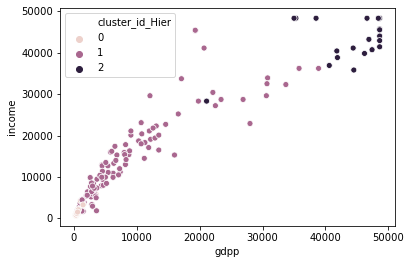

In [61]:
sns.scatterplot(x='gdpp',y='income',data=df,hue='cluster_id_Hier')
plt.show()

 - A small segment is taken by cluster 0 which basically represents least income & least gdpp countries (under developed countries)
 - High chunck of countries fall in Cluster 1 representing nominal income & nominal gdpp countries (Developing countries)
 - A very small segment is taken by cluster 2 which basically represents highest income & highest gdpp countries (developed countries)

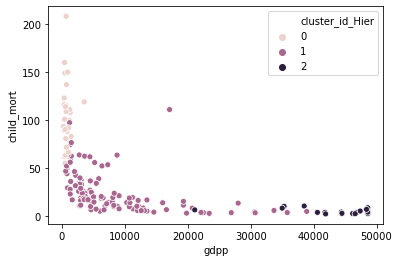

In [62]:
sns.scatterplot(x='gdpp',y='child_mort',data=df,hue='cluster_id_Hier')
plt.show()

 - A small segment is taken by cluster 0 which basically represents highest child mortality rate & least gdpp countries (under developed countries)
 - High chunck of countries fall in Cluster 1 representing medium (better than cluster 0) mortality & nominal gdpp countries (Developing countries)
 - A very small segment is taken by cluster 2 which basically represents least child mortality rate & highest gdpp countries (developed countries)

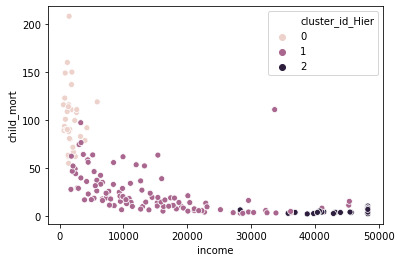

In [63]:
sns.scatterplot(x='income',y='child_mort',data=df,hue='cluster_id_Hier')
plt.show()

 - A small segment is taken by cluster 0 which basically represents highest child mortality rate & least income countries (under developed countries)
 - High chunck of countries fall in Cluster 1 representing medium (better than cluster 0) mortality & nominal income countries (Developing countries)
 - A very small segment is taken by cluster 2 which basically represents least child mortality rate & highest income countries (developed countries)

### Cluster Profiling

In [64]:
df.groupby(['cluster_id_Hier'])[['gdpp','income','child_mort']].mean()

,gdpp,income,child_mort
cluster_id_Hier,,,
0,779.454545,1866.151515,102.154545
1,8724.200000,14204.818182,25.195455
2,44177.826087,43439.565217,5.152174


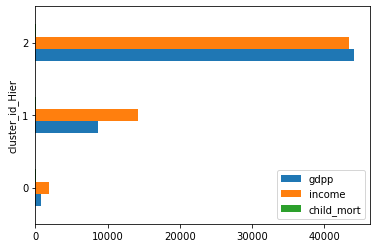

In [65]:
df.groupby(['cluster_id_Hier'])[['gdpp','income','child_mort']].mean().plot(kind='barh')
plt.show()

#### Obervation:
- We can clearly see :
    - Cluster 2 belongs to countries with sufficiently high income, high GDPP (developed countries) and therefore least Child Mortality rate (5.2)
    - Cluster 1 belongs to countries with medium income & GDPP (developing countries) & thus increased Child Mortality (25.2)
    - Cluster 0 belongs to least income, least GDPP group of countries (under-developed countries) with highest child mortality (102).

###### Thus, since Cluster 0 consists of under-developed countries, there would certainly be countries within it which are definitely in dire need of aid

### Identifying the country names in need of aid

In [66]:
aid_grp_Hier = df[df['cluster_id_Hier']==0] # group of countries (belonging to cluster 0) requiring aid
aid_grp_Hier.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,cluster_id,cluster_id_Hier
0,Afghanistan,90.2,55.3000,41.9174,248.297,1610.0,9.440,56.2,5.82,553,2,0
3,Angola,119.0,2199.1900,100.6050,1514.370,5900.0,22.400,60.1,6.16,3530,2,0
17,Benin,111.0,180.4040,31.0780,281.976,1820.0,0.885,61.8,5.36,758,2,0
25,Burkina Faso,116.0,110.4000,38.7550,170.200,1430.0,6.810,57.9,5.87,575,2,0
26,Burundi,93.6,20.6052,26.7960,90.552,764.0,12.300,57.7,6.26,231,2,0


In [67]:
# List of top 10 countries ordered in ascending order of Income,GDPP and descending order of Mortality rate.
aid_grp_Hier.sort_values(by=['income','gdpp','child_mort'],ascending=[True,True,False]).head(10)

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,cluster_id,cluster_id_Hier
37,"Congo, Dem. Rep.",116.0,137.2740,26.4194,165.664,609.0,20.80,57.5,6.54,334,2,0
88,Liberia,89.3,62.4570,38.5860,302.802,700.0,5.47,60.8,5.02,327,2,0
26,Burundi,93.6,20.6052,26.7960,90.552,764.0,12.30,57.7,6.26,231,2,0
112,Niger,123.0,77.2560,17.9568,170.868,814.0,2.55,58.8,7.49,348,2,0
31,Central African Republic,149.0,52.6280,17.7508,118.190,888.0,2.01,47.5,5.21,446,2,0
106,Mozambique,101.0,131.9850,21.8299,193.578,918.0,7.64,54.5,5.56,419,2,0
94,Malawi,90.5,104.6520,30.2481,160.191,1030.0,12.10,53.1,5.31,459,2,0
63,Guinea,109.0,196.3440,31.9464,279.936,1190.0,16.10,58.0,5.34,648,2,0
150,Togo,90.3,196.1760,37.3320,279.624,1210.0,1.18,58.7,4.87,488,2,0
132,Sierra Leone,160.0,67.0320,52.2690,137.655,1220.0,17.20,55.0,5.20,399,2,0


##### Recommendation based on above Hierarchical clustering analysis:
- Above is the ordered list of 'TOP 10' countries with least Income, GDPP and highest mortality rates among all the crisis hit regions.

## Summary
- We performed Data quality check and found it good.
- Did EDA
- Did outlier treatments as per business/use case requirement.
- Did proper scaling (Standard Scaling) of the data
- Tested clustering tendancy using hopkinsons and found it relevant.
- Evaluated efficient value of clusters (k) using both SSD & Silhouette curve.
- Created 3 clusters via 2 different methods : Kmeans and Hierarchical (Single & Complete) Clustering algorithm
- Performed cluster profiling for clusters formed by both methods and listed TOP 10 countries with worst situation and best candidate for immidiate help.

#### We got same 10 countries by both methods (in same order)

## Final Recommendation
- Based on the socio-economic factors of various countries we found below listed countires to be the TOP 10 worst affected of all (sorted in ascending order by GDPP, Income & descending order by Child mortality):

- From left to right: Decreasing order of urgency
##### Congo, Dem. Rep., Liberia, Burundi, Niger, Central African Republic, Mozambique, Malawi, Guinea, Togo, Sierra Leone


- These countries are in dire need of basic amenities and relief

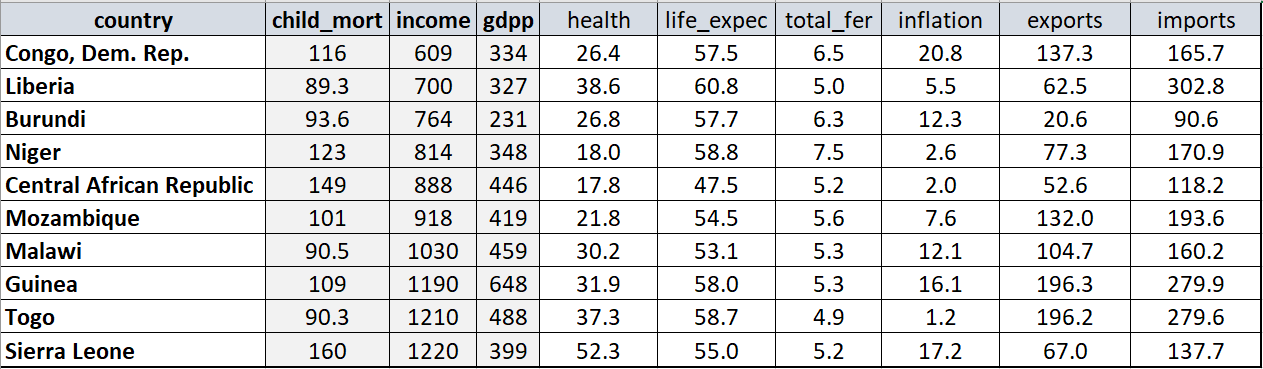